<a href="https://colab.research.google.com/github/leesolhahaha/data-analysis-ta/blob/main/7_pivot_melt_%EC%98%A8%EB%9D%BC%EC%9D%B8%EC%87%BC%ED%95%91_%ED%95%B4%EC%99%B8%EC%A7%81%EC%A0%91%ED%8C%90%EB%A7%A4%EC%95%A1_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 멀티 인덱스
- groupby() 메소드에 여러 열을 리스트 형태로 전달하면 각 열들이 다중으로 행 인덱스를 구성하는 것을 보았다.
- 판다스는 <u>행 인덱스를 여러 레벨로 구현할 수 있도록 멀티인덱스(MultiIndex) 클래스를 지원</u>한다.

In [ ]:
# 라이브러리 불러오기

import pandas as pd
import seaborn as sns

In [ ]:
# seaborn의 titanic데이터셋 불러오기, 변수 titanic에 대입

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# titanic  데이터셋에서 age, sex, class, fare, survived 열을 선택하여 데이터 프레임 df만들기

df = titanic[['age', 'sex', 'class', 'fare', 'survived']].copy()
df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [ ]:
# df를 'class', 'sex'열을 기준으로 분할하여 평균 구하기
# 결과를 gdf에 대입하기

gdf = df.groupby(['class', 'sex']).mean()
gdf

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [ ]:
# 위 결과의 index확인하기

gdf.index

MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])

In [ ]:
# 데이터프레임 gdf의 멀티인덱스에서 하나의 인덱스만 사용하는 방법
# class 값이 First인 행을 선택

gdf.loc['First']

,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


In [ ]:
# 멀티인덱스에서 두개의 인덱스를 사용하는 방법
# loc인덱서를 사용하고 인자로는 투플() 사용
# class값이 First이고, sex값이 female 인 행을 선택

gdf.loc[('First', 'female')]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

In [ ]:
# iloc를 이용하여 0번째 행 선택하기

gdf.iloc[0]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

In [ ]:
# 'age'열 선택

gdf['age']

class   sex   
First   female    34.611765
        male      41.281386
Second  female    28.722973
        male      30.740707
Third   female    21.750000
        male      26.507589
Name: age, dtype: float64

#2 피벗테이블

- 판다스 pivot_table() 함수는 엑셀에서 사용하는 피벗테이블과 비슷한 기능을 처리한다.
- <b><u>피벗테이블을 구성하는 4가지 요소(행인덱스, 열인덱스, 데이터값, 데이터집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달</u></b>한다.

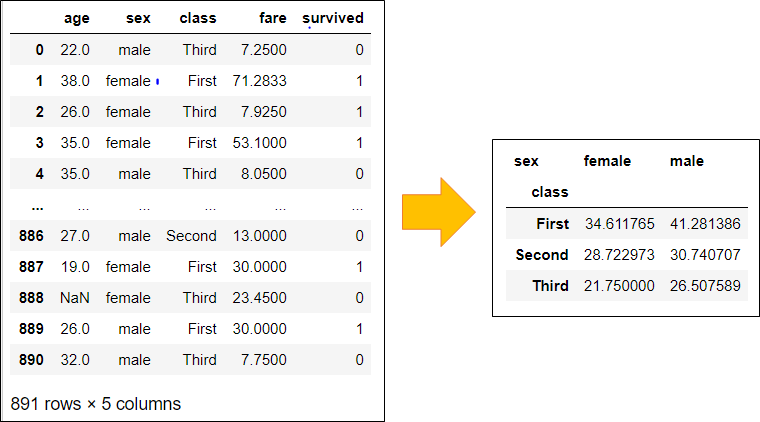

In [ ]:
# df확인

df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [ ]:
# pivot_table()함수를 사용하여 데이터프레임 형태를 피벗테이블로 변환한다.
# 5개의 열중에서 행인덱스로는 'class'열을 지정하고, 열 인덱스에는 'sex'열을 지정한다.
# 'age'열을 피벗의 데이터값으로 사용하고 데이터를 집계하는 함수는 평균값을 계산하는 'mean'함수를 지정한다.

# 행, 열, 값, 집계에 사용할 열을 1개씩 지정 - 평균집계
pd.pivot_table(df,                                    # 피벗할 데이터프레임
                index='class',                  # 행 위치에 들어갈 열
                columns='sex',        # 열 위치에 들어갈 열
                values='age',        # 데이터로 사용할 열
                aggfunc='mean'                     # 데이터 집계함수
 )


sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [ ]:
# 값에 적용하는 집계 함수를 2개 이상 지정 가능함 - 생존률, 생존자 수 집계
pd.pivot_table(df, index='class', columns='sex', values='age', aggfunc=['mean','sum'])                                           # 피벗할 데이터프레임
                                              # 행 위치에 들어갈 열
                                              # 열 위치에 들어갈 열
                                              # 데이터로 사용할 열
                                              # 데이터 집계함수
# df.groupby('class').mean()


mean                sum         
sex        female       male  female     male
class                                        
First   34.611765  41.281386  2942.0  4169.42
Second  28.722973  30.740707  2125.5  3043.33
Third   21.750000  26.507589  2218.5  6706.42

In [ ]:
df.pivot_table(index=['class', 'sex'], columns='survived', values=['age','fare'], aggfunc=['mean', 'max'])

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [ ]:
# 행, 열, 값에 사용할 열을 2개 이상 지정 가능 - 평균나이, 최대 요금 집계
a = pd.pivot_table(df, index=['class', 'sex'], columns='survived', values=['age', 'fare'], aggfunc=['mean', 'max'])
                                             # 피벗할 데이터프레임
                                              # 행 위치에 들어갈 열
                                              # 열 위치에 들어갈 열
                                              # 데이터로 사용할 열
                                              # 데이터 집계 함수
a

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [ ]:
# 행인데스 확인

a.index

MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])

In [ ]:
# 컬럼확인

a.columns

MultiIndex([('mean',  'age', 0),
            ('mean',  'age', 1),
            ('mean', 'fare', 0),
            ('mean', 'fare', 1),
            ( 'max',  'age', 0),
            ( 'max',  'age', 1),
            ( 'max', 'fare', 0),
            ( 'max', 'fare', 1)],
           names=[None, None, 'survived'])

In [ ]:
# 'First' 행선택

a.loc['First']

mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292

In [ ]:
a


mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [ ]:
# ('First', 'female')행 선택

a.loc[('First', 'female')]

            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64

In [ ]:
# ('max', 'fare', 1)열 선택

a[('max', 'fare', 1)]

class   sex   
First   female    512.3292
        male      512.3292
Second  female     65.0000
        male       39.0000
Third   female     31.3875
        male       56.4958
Name: (max, fare, 1), dtype: float64

In [ ]:
# iloc로 1번행 선택

a.iloc[2]

            survived
mean  age   0           36.000000
            1           28.080882
      fare  0           18.250000
            1           22.288989
max   age   0           57.000000
            1           55.000000
      fare  0           26.000000
            1           65.000000
Name: (Second, female), dtype: float64

#3 melt

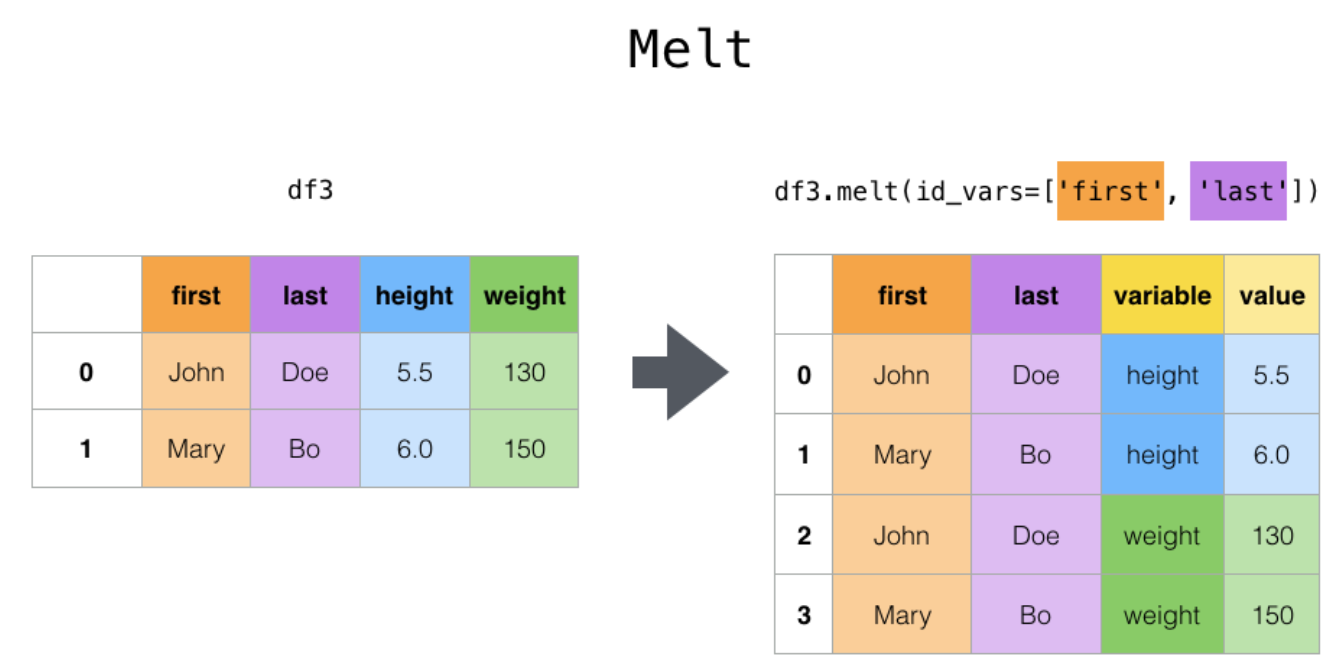

In [ ]:
# 데이터프레임 만들기

df3 = pd.DataFrame({'first':['John','Mery'],
             'last': ['Doe', 'Bo'],
             'height': [5.5,6.0],
             'weight' : [130,150]})
df3

,first,last,height,weight
0,John,Doe,5.5,130
1,Mery,Bo,6.0,150


In [ ]:
# 컬럼으로 'first', 'last'열만 남겨놓고 melt한다.
# 나머지 컬럼 'height'와 'weight'의 컬럼명은 새로운 컬럼인 'variable'의 데이터가 되고,
# 나머지 컬럼 'height'와 'weight'의 원래 데이터는 새로운 컬럼인 'value'의 데이터가 된다.

df3.melt(id_vars=['first', 'last'])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mery,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mery,Bo,weight,150.0


In [ ]:
# 컬럼으로 'first', 'last'열만 남겨놓고 melt한다.
# 나머지 컬럼 'height'와 'weight'의 컬럼명은 새로운 컬럼인 'property'의 데이터가 되고,
# 나머지 컬럼 'height'와 'weight'의 원래 데이터는 새로운 컬럼인 'data'의 데이터가 된다.

df3.melt(id_vars=['first', 'last'], var_name='변수명' , value_name='변수값')

,first,last,변수명,변수값
0,John,Doe,height,5.5
1,Mery,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mery,Bo,weight,150.0



#4 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 살펴보기


* 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* './data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액.csv' 파일을 읽어와서 살펴본다.
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 위에 내용을 실행하고 런타임을 다시 시작해줘야 함

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,621 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and dire

##4.1 필요 라이브러리 가져오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

##4.2 시각화를 위한 폰트 설정

In [ ]:
# 한글폰드 오류해결
plt.rc('font', family='NanumBarunGothic')

# x,y축에 -부호 오류 해결
plt.rc('axes', unicode_minus=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##4.3 데이터 로드하기

In [ ]:
# 데이터파일을 로드해서 df_raw라는 변수에 대입, encoding="cp949"로 불러오기

df_raw = pd.read_csv('/content/drive/MyDrive/데이터 분석 특강/ data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액.csv', encoding="cp949")
df_raw

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,921586,974060,1250236,1344404,1525396,1879499,1525487,1277716,1621245,1536884
1,합계,합계,면세점,-,-,-,-,-,-,-,...,761836,770656,1070693,1157158,1336372,1655635,1297490,1051987,1410967,1247495
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,159750,203404,179543,187246,189024,223864,227997,225729,210278,289389
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,4320,4511,3702,4038,3670,3826,4142,3812,7777,3591
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,1,215,2,0,1,70,113,0,3497,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,기타,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,-,-,-,-,-,-,-,...,504,589,465,488,308,531,384,334,353,391
447,기타,기 타,계,765,735,849,804,788,805,724,...,1120,770,711,689,469,1094,939,710,826,870
448,기타,기 타,면세점,-,-,-,-,-,-,-,...,404,0,0,1,0,1,0,0,0,0


In [ ]:
# 앞 10개의 데이터 보기

df_raw.head(10)

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,921586,974060,1250236,1344404,1525396,1879499,1525487,1277716,1621245,1536884
1,합계,합계,면세점,-,-,-,-,-,-,-,...,761836,770656,1070693,1157158,1336372,1655635,1297490,1051987,1410967,1247495
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,159750,203404,179543,187246,189024,223864,227997,225729,210278,289389
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,4320,4511,3702,4038,3670,3826,4142,3812,7777,3591
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,1,215,2,0,1,70,113,0,3497,0
5,합계,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,4319,4296,3700,4038,3669,3756,4029,3812,4280,3591
6,합계,가전·전자·통신기기,계,13259,13824,13560,14200,13399,13587,12857,...,27358,18073,21429,22798,25419,24131,12866,14052,14958,13103
7,합계,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,20481,11104,14072,15843,17370,15478,4999,5108,4777,5538
8,합계,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,6877,6969,7357,6955,8049,8653,7867,8944,10181,7565
9,합계,소프트웨어,계,361,330,372,595,807,484,591,...,313,408,150,228,144,387,183,227,179,375


In [ ]:
# 마지막 10개의 데이터 보기

df_raw.tail(10)

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4 p)
440,기타,음·식료품,면세점 이외,-,-,-,-,-,-,-,...,52,84,251,249,125,177,1370,117,34,75
441,기타,농축수산물,계,980,1019,702,819,673,833,790,...,0,0,0,0,0,2,2,3,1,3
442,기타,농축수산물,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
443,기타,농축수산물,면세점 이외,-,-,-,-,-,-,-,...,0,0,0,0,0,2,2,3,1,3
444,기타,생활용품 및 자동차용품,계,1265,1171,1096,877,741,817,738,...,504,589,465,488,308,531,384,334,353,391
445,기타,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,-,-,-,-,-,-,-,...,504,589,465,488,308,531,384,334,353,391
447,기타,기 타,계,765,735,849,804,788,805,724,...,1120,770,711,689,469,1094,939,710,826,870
448,기타,기 타,면세점,-,-,-,-,-,-,-,...,404,0,0,1,0,1,0,0,0,0
449,기타,기 타,면세점 이외,-,-,-,-,-,-,-,...,716,770,711,688,469,1093,939,710,826,870


In [ ]:
# 샘플데이터10개 보기

df_raw.sample(10)

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4 p)
336,중남미,의류 및 패션 관련상품,계,271,290,231,183,149,177,145,...,156,158,150,157,112,124,113,107,141,249
285,중동,사무·문구,계,0,0,0,0,0,0,0,...,0,3,1,1,2,0,1,1,2,0
175,일본,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
425,기타,음반·비디오·악기,면세점 이외,-,-,-,-,-,-,-,...,327,320,307,372,244,336,354,275,299,482
329,중남미,서 적,면세점 이외,-,-,-,-,-,-,-,...,125,136,141,184,115,206,160,3,4,17
318,중남미,컴퓨터 및 주변기기,계,94,94,100,72,71,55,67,...,54,66,56,59,58,61,42,97,154,69
170,일본,음·식료품,면세점 이외,-,-,-,-,-,-,-,...,231,858,789,449,737,925,1653,734,161,302
270,중동,합계,계,2262,2242,2101,2299,2187,2223,2095,...,1947,2504,2252,2475,1826,2742,3284,2522,2858,2747
146,일본,소프트웨어,면세점 이외,-,-,-,-,-,-,-,...,2,1,5,7,1,1,1,0,1,20
189,아세안(ASEAN),소프트웨어,계,19,17,18,27,149,50,27,...,13,6,3,4,1,0,2,1,0,0


In [ ]:
# 행, 열

df_raw.shape

(450, 31)

In [ ]:
# 컬럼명

df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4', '2020 1/4', '2020 2/4', '2020 3/4',
       '2020 4/4 p)'],
      dtype='object')

In [ ]:
# 요약정보

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   국가(대륙)별      450 non-null    object
 1   상품군별         450 non-null    object
 2   판매유형별        450 non-null    object
 3   2014 1/4     450 non-null    object
 4   2014 2/4     450 non-null    object
 5   2014 3/4     450 non-null    object
 6   2014 4/4     450 non-null    object
 7   2015 1/4     450 non-null    object
 8   2015 2/4     450 non-null    object
 9   2015 3/4     450 non-null    object
 10  2015 4/4     450 non-null    object
 11  2016 1/4     450 non-null    object
 12  2016 2/4     450 non-null    object
 13  2016 3/4     450 non-null    object
 14  2016 4/4     450 non-null    object
 15  2017 1/4     450 non-null    int64 
 16  2017 2/4     450 non-null    int64 
 17  2017 3/4     450 non-null    int64 
 18  2017 4/4     450 non-null    int64 
 19  2018 1/4     450 non-null    

In [ ]:
# 국가(대륙)별 컬럼의 고유값과 개수 확인하기


df_raw['국가(대륙)별'].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [ ]:
# 상품군별 컬럼의 고유값과 개수 확인하기

df_raw['상품군별'].value_counts()

합계              30
컴퓨터 및 주변기기      30
가전·전자·통신기기      30
소프트웨어           30
서 적             30
사무·문구           30
음반·비디오·악기       30
의류 및 패션 관련상품    30
스포츠·레저용품        30
화장품             30
아동·유아용품         30
음·식료품           30
농축수산물           30
생활용품 및 자동차용품    30
기 타             30
Name: 상품군별, dtype: int64

In [ ]:
# 판매유형별 컬럼의 고유값과 개수 확인하기

df_raw['판매유형별'].value_counts()

계         150
면세점       150
면세점 이외    150
Name: 판매유형별, dtype: int64

In [ ]:
# 중국 데이터만 따로 보기

df_raw.loc[df_raw['국가(대륙)별'] == '중국']

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4 p)
90,중국,합계,계,55066,68938,77525,117223,170201,183801,173699,...,744661,782962,1055895,1140195,1317494,1664465,1327577,1095112,1455680,1347954
91,중국,합계,면세점,-,-,-,-,-,-,-,...,707619,727126,1012118,1092077,1270158,1599893,1253633,1034738,1392952,1229759
92,중국,합계,면세점 이외,-,-,-,-,-,-,-,...,37042,55836,43777,48118,47336,64572,73944,60374,62728,118195
93,중국,컴퓨터 및 주변기기,계,32,34,65,68,80,50,77,...,17,178,31,19,27,104,61,41,3567,57
94,중국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,1,152,2,0,1,70,0,0,3497,0
95,중국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,16,26,29,19,26,34,61,41,70,57
96,중국,가전·전자·통신기기,계,761,1421,1342,1542,2072,2370,2354,...,18970,10639,13657,14507,15180,12404,3096,2123,3249,5203
97,중국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,18740,10349,13347,14160,14778,11952,2653,1723,2933,5041
98,중국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,230,290,310,347,402,452,443,400,316,162
99,중국,소프트웨어,계,126,128,198,255,281,194,205,...,4,13,6,1,0,0,1,2,1,0


## 4.4 분석과 시각화를 위한 tidy data 만들기


In [ ]:
# df_raw의 연도분기를 나타내는 모든 열을 melt이용해 정리하기
# 정리된 결과를 df에 대입

df = df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'], var_name='기간', value_name='million')
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
12595,기타,생활용품 및 자동차용품,면세점,2020 4/4 p),0
12596,기타,생활용품 및 자동차용품,면세점 이외,2020 4/4 p),391
12597,기타,기 타,계,2020 4/4 p),870
12598,기타,기 타,면세점,2020 4/4 p),0


##4.5 데이터 전처리


###4.5.1 기간에서 연도, 분기를 분리하기

In [ ]:
df.dtypes

국가(대륙)별    object
상품군별       object
판매유형별      object
기간         object
million    object
dtype: object

In [ ]:
# df의 '기간'열에서 연도분리하기
# 분리된 연도를 새로운 컬럼 '연도'를 생성하고 대입하기

df['기간'].str.split().str[0]
df['연도'] = df['기간'].str.split().str.get(0)

In [ ]:
# df

df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014
...,...,...,...,...,...,...
12595,기타,생활용품 및 자동차용품,면세점,2020 4/4 p),0,2020
12596,기타,생활용품 및 자동차용품,면세점 이외,2020 4/4 p),391,2020
12597,기타,기 타,계,2020 4/4 p),870,2020
12598,기타,기 타,면세점,2020 4/4 p),0,2020


In [ ]:
# df의 '기간'열에서 분기 분리하기
# 분리된 분기를 새로운 컬럼 '분기'를 생성하고 대입하기

df['분기'] = df['기간'].str.split().str[1].str.split('/').str[0]
# df['기간'].str.split().str[1].str.split('/').str.get(0)

In [ ]:
# df['분기'] 확인

df['분기']

0        1
1        1
2        1
3        1
4        1
        ..
12595    4
12596    4
12597    4
12598    4
12599    4
Name: 분기, Length: 12600, dtype: object

In [ ]:
# '분기'열을 int형으로 변환

df['분기'] = df['분기'].astype('int')

In [ ]:
# df.head()

df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


In [ ]:
# df의 요약정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  12600 non-null  object
 1   상품군별     12600 non-null  object
 2   판매유형별    12600 non-null  object
 3   기간       12600 non-null  object
 4   million  12600 non-null  object
 5   연도       12600 non-null  object
 6   분기       12600 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 689.2+ KB


### 4.5.2 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [ ]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '기간', 'million', '연도', '분기'], dtype='object')

In [ ]:
# 'million'열의 데이터 타입확인

df['million'].dtypes

dtype('O')

In [ ]:
# 'million'열의 고유데이터 종료 및 개수 확인

df['million'].value_counts()

-         3600
0         1821
1          134
4           89
2           88
          ... 
26552        1
535868       1
526306       1
9562         1
9716         1
Name: million, Length: 3504, dtype: int64

In [ ]:
# nan처리를 위해 numpy 임포트 하기

import numpy as np

In [ ]:
# 'million'열의 '-'를 NaN으로 변경하고 열의 데이터 타입을 float형으로 변환
# 결과를 'million'열에 대입

df['million'] = df['million'].replace('-', np.nan).astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  12600 non-null  object 
 1   상품군별     12600 non-null  object 
 2   판매유형별    12600 non-null  object 
 3   기간       12600 non-null  object 
 4   million  9000 non-null   float64
 5   연도       12600 non-null  object 
 6   분기       12600 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 689.2+ KB


In [ ]:
# df 확인

df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
12595,기타,생활용품 및 자동차용품,면세점,2020 4/4 p),0.0,2020,4
12596,기타,생활용품 및 자동차용품,면세점 이외,2020 4/4 p),391.0,2020,4
12597,기타,기 타,계,2020 4/4 p),870.0,2020,4
12598,기타,기 타,면세점,2020 4/4 p),0.0,2020,4



### 4.5.3필요없는 데이터 제거하기

In [ ]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거
# '국가(대륙)별'이 합계가 아니고, '상품군별'이 '합계'가 아니고 '판매유형별'이 '계'가 아닌 행들만 선택하여
# df에 대입

df = df.loc[(df['국가(대륙)별'] != '합계') & (df['상품군별'] != '합계') & (df['판매유형별'] != '계')]
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014 1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
12593,기타,농축수산물,면세점 이외,2020 4/4 p),3.0,2020,4
12595,기타,생활용품 및 자동차용품,면세점,2020 4/4 p),0.0,2020,4
12596,기타,생활용품 및 자동차용품,면세점 이외,2020 4/4 p),391.0,2020,4
12598,기타,기 타,면세점,2020 4/4 p),0.0,2020,4


In [ ]:
# '국가(대륙)별' 고유데이터와 개수 확인

df['국가(대륙)별'].value_counts()

미국            784
중국            784
일본            784
아세안(ASEAN)    784
유럽연합(EU)      784
중동            784
중남미           784
대양주           784
기타            784
Name: 국가(대륙)별, dtype: int64

In [ ]:
# '상품군별' 고유데이터와 개수 확인

df['상품군별'].value_counts()

컴퓨터 및 주변기기      504
가전·전자·통신기기      504
소프트웨어           504
서 적             504
사무·문구           504
음반·비디오·악기       504
의류 및 패션 관련상품    504
스포츠·레저용품        504
화장품             504
아동·유아용품         504
음·식료품           504
농축수산물           504
생활용품 및 자동차용품    504
기 타             504
Name: 상품군별, dtype: int64

In [ ]:
# '판매유형별' 고유데이터와 개수 확인

df['판매유형별'].value_counts()

면세점       3528
면세점 이외    3528
Name: 판매유형별, dtype: int64

In [ ]:
# df의 요약정보

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 49 to 12599
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  7056 non-null   object 
 1   상품군별     7056 non-null   object 
 2   판매유형별    7056 non-null   object 
 3   기간       7056 non-null   object 
 4   million  4032 non-null   float64
 5   연도       7056 non-null   object 
 6   분기       7056 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 441.0+ KB


In [ ]:
# df이 결측치 수

df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    3024
연도            0
분기            0
dtype: int64

## 4.6 시각화하기


### 4.6.1 연도별로 전체 상품군별, 국가(대륙)별 판매액을 시각화해본다.

In [ ]:
# 연도별, 상품군별 판매액 합을 구하는 피벗 테이블 만들기
# df_year_product

df_year_product = df.pivot_table(index='연도', columns='상품군별', values='million', aggfunc='sum')
df_year_product

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
연도,,,,,,,,,,,,,,
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,75141.0,44235.0,118.0,6115.0,47041.0,21524.0,614.0,16640.0,17819.0,31052.0,34859.0,410938.0,8829.0,2235982.0
2018,99226.0,54329.0,214.0,4341.0,41103.0,28351.0,1344.0,15265.0,19665.0,46052.0,59642.0,528786.0,17921.0,2710284.0
2019,93777.0,61683.0,126.0,5898.0,48706.0,24272.0,909.0,18490.0,19109.0,39711.0,89433.0,564606.0,15236.0,5017579.0
2020,54979.0,93794.0,150.0,5796.0,35532.0,27108.0,964.0,19951.0,17496.0,23568.0,207677.0,381734.0,19322.0,5073261.0


<Axes: xlabel='연도'>

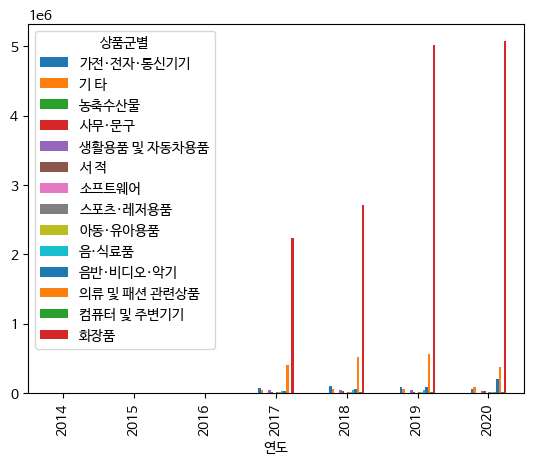

In [ ]:
df_year_product.plot.bar()

<Axes: xlabel='연도'>

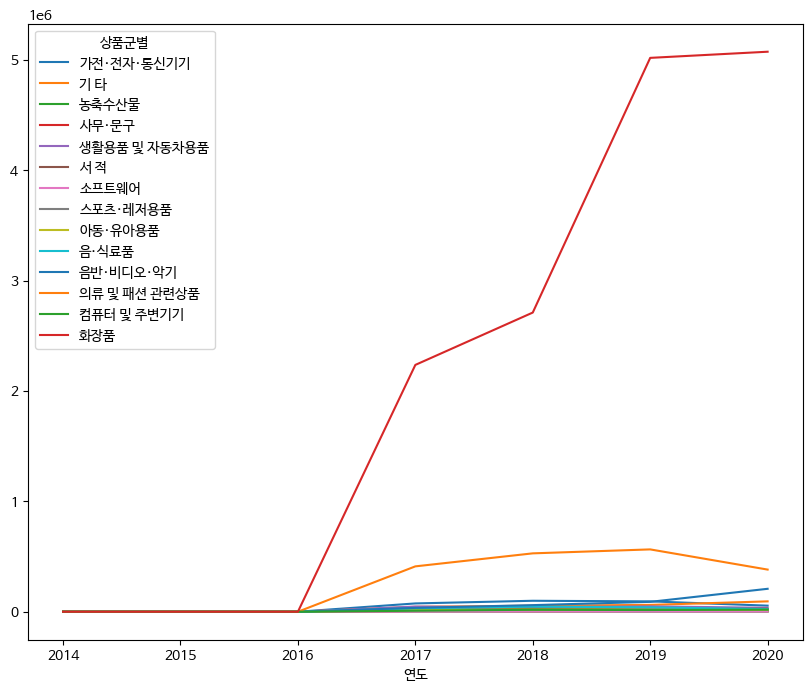

In [ ]:
# 연도별 , 상품군별 판매액을 선그래프로 시각화하기

df_year_product.plot(figsize=(10, 8))

In [ ]:
# 연도별, 국가(대륙)별 판매액의 합을 구하는 피벗테이블 만들기
# df_year_country

df_year_country = df.pivot_table(index='연도', columns='국가(대륙)별', values='million', aggfunc='sum')
df_year_country

국가(대륙)별,기타,대양주,미국,아세안(ASEAN),유럽연합(EU),일본,중국,중남미,중동
연도,,,,,,,,,
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,138472.0,19005.0,181281.0,107903.0,31616.0,138176.0,2316179.0,10245.0,8030.0
2018,129966.0,17563.0,169495.0,165973.0,37566.0,194376.0,2891892.0,11669.0,8023.0
2019,120317.0,13170.0,195013.0,204759.0,40144.0,225808.0,5178049.0,12980.0,9295.0
2020,83716.0,15901.0,235027.0,140423.0,40807.0,195172.0,5226323.0,12552.0,11411.0


<Axes: xlabel='연도'>

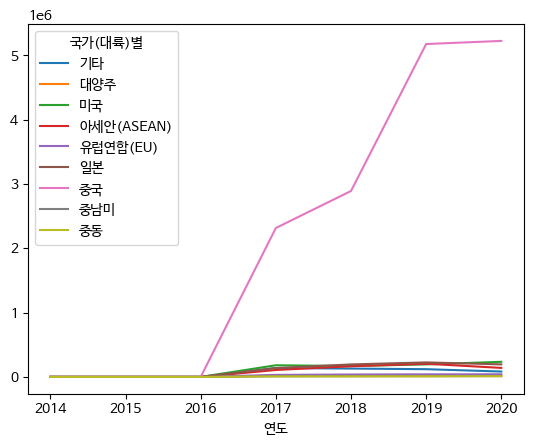

In [ ]:
# 연도별 , 국가대륙별 판매액을 선그래프로 시가기화하기

df_year_country.plot()

<Axes: xlabel='연도'>

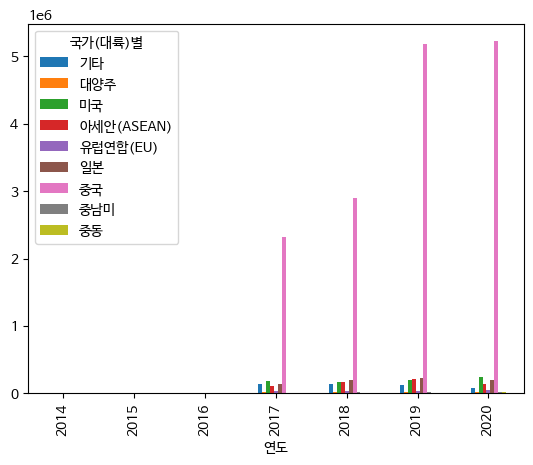

In [ ]:
# 연도별 , 국가대륙별 판매액을 막대그래프로 시가기화하기

df_year_country.plot.bar()

### 4.6.2 중국의 정보를 따로 추출하여 상품군별 판매액 총합을 시각화해본다.

In [ ]:
# 국가(대륙)별, 상품군별, 연도별 판매액의 총합을 구하는 피벗테이블 만들기
# df_country_product_year

df_country_product_year = df.pivot_table(index=['국가(대륙)별', '상품군별'], columns= '연도', values='million', aggfunc='sum')
df_country_product_year

연도                    2014  2015  2016    2017    2018    2019    2020
국가(대륙)별 상품군별                                                          
기타      가전·전자·통신기기     0.0   0.0   0.0  7371.0  3870.0  3684.0  3837.0
        기 타            0.0   0.0   0.0  3544.0  4020.0  2963.0  3345.0
        농축수산물          0.0   0.0   0.0     2.0     3.0     2.0     9.0
        사무·문구          0.0   0.0   0.0   126.0   120.0    95.0   187.0
        생활용품 및 자동차용품   0.0   0.0   0.0  2453.0  2227.0  1792.0  1462.0
...                    ...   ...   ...     ...     ...     ...     ...
중동      음·식료품          0.0   0.0   0.0    18.0    17.0    27.0   927.0
        음반·비디오·악기      0.0   0.0   0.0   398.0   784.0  1107.0  3250.0
        의류 및 패션 관련상품   0.0   0.0   0.0   772.0   879.0   924.0  1727.0
        컴퓨터 및 주변기기     0.0   0.0   0.0   544.0   250.0   335.0   388.0
        화장품            0.0   0.0   0.0  2333.0  2866.0  3399.0  2217.0

[126 rows x 7 columns]

In [ ]:
# 국가(대륙)별, 상품군별, 연도별 판매액의 총합을 구하는 피벗테이블에서 중국만 추출하기
# df_china_product_year

df_china_product_year = df_country_product_year.loc['중국']
df_china_product_year

연도,2014,2015,2016,2017,2018,2019,2020
상품군별,,,,,,,
가전·전자·통신기기,0.0,0.0,0.0,31915.0,65423.0,55748.0,13671.0
기 타,0.0,0.0,0.0,3881.0,5780.0,5624.0,22248.0
농축수산물,0.0,0.0,0.0,64.0,120.0,59.0,88.0
사무·문구,0.0,0.0,0.0,340.0,297.0,216.0,407.0
생활용품 및 자동차용품,0.0,0.0,0.0,16329.0,13802.0,17172.0,6676.0
서 적,0.0,0.0,0.0,5805.0,6297.0,5073.0,6658.0
소프트웨어,0.0,0.0,0.0,69.0,27.0,7.0,4.0
스포츠·레저용품,0.0,0.0,0.0,2951.0,1739.0,1993.0,3183.0
아동·유아용품,0.0,0.0,0.0,7493.0,6387.0,4959.0,5621.0


In [ ]:
# df_china_product_year를 전치하기
# df_china_year_product

df_china_year_product = df_china_product_year.T
df_china_year_product

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
연도,,,,,,,,,,,,,,
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,31915.0,3881.0,64.0,340.0,16329.0,5805.0,69.0,2951.0,7493.0,23658.0,8437.0,225407.0,180.0,1989650.0
2018,65423.0,5780.0,120.0,297.0,13802.0,6297.0,27.0,1739.0,6387.0,34699.0,15046.0,288848.0,255.0,2453172.0
2019,55748.0,5624.0,59.0,216.0,17172.0,5073.0,7.0,1993.0,4959.0,30361.0,36193.0,330254.0,181.0,4690209.0
2020,13671.0,22248.0,88.0,407.0,6676.0,6658.0,4.0,3183.0,5621.0,9531.0,124889.0,139624.0,3726.0,4889997.0


<Axes: xlabel='연도'>

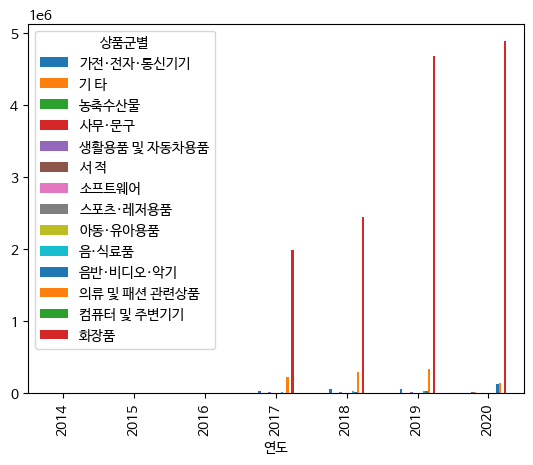

In [ ]:
# 중국의 연도별, 상품군별 판매총액을 막대그래프로 시각화하기

df_china_year_product.plot.bar()

### 4.6.3 화장품만 따로 추출하여 국가(대륙)별 판매액 총합을 시각화해본다

In [ ]:
# 상품중 화장품만 선택해 df_cosmetic만들기

df_cosmetic = df.loc[df['상품군별'] == '화장품']
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
73,미국,화장품,면세점,2014 1/4,NaN,2014,1
74,미국,화장품,면세점 이외,2014 1/4,NaN,2014,1
118,중국,화장품,면세점,2014 1/4,NaN,2014,1
119,중국,화장품,면세점 이외,2014 1/4,NaN,2014,1
163,일본,화장품,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
12494,중남미,화장품,면세점 이외,2020 4/4 p),169.0,2020,4
12538,대양주,화장품,면세점,2020 4/4 p),1.0,2020,4
12539,대양주,화장품,면세점 이외,2020 4/4 p),467.0,2020,4
12583,기타,화장품,면세점,2020 4/4 p),6401.0,2020,4


In [ ]:
# 화장품의 국가(대륙별) 판매액 총합을 구하기

df_cosmetic_contry = df_cosmetic.groupby('국가(대륙)별')[['million']].sum()
df_cosmetic_contry

,million
국가(대륙)별,
기타,322857.0
대양주,14389.0
미국,215303.0
아세안(ASEAN),285885.0
유럽연합(EU),42832.0
일본,114687.0
중국,14023028.0
중남미,7310.0
중동,10815.0


<Axes: xlabel='국가(대륙)별'>

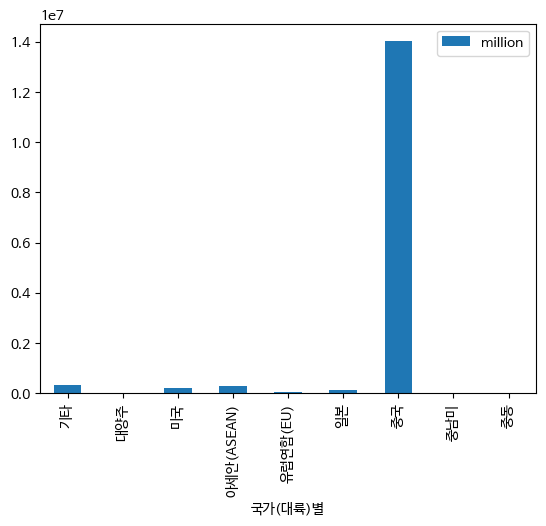

In [ ]:
# 화장품의 국가대륙별 판매액 총합을 막대 그래프로 시각화하기

df_cosmetic_contry.plot.bar()

### 4.6.4 중국의 화장품 정보만 추출해서 판매유형별 판매액 총합을 시각화해본다.

In [ ]:
# 중국의 화장품 정보만 추출해 df_china_cosmetic 만들기

df_china_cosmetic = df.loc[(df['상품군별'] == '화장품') & (df['국가(대륙)별'] == '중국')]
df_china_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
118,중국,화장품,면세점,2014 1/4,NaN,2014,1
119,중국,화장품,면세점 이외,2014 1/4,NaN,2014,1
568,중국,화장품,면세점,2014 2/4,NaN,2014,2
569,중국,화장품,면세점 이외,2014 2/4,NaN,2014,2
1018,중국,화장품,면세점,2014 3/4,NaN,2014,3
1019,중국,화장품,면세점 이외,2014 3/4,NaN,2014,3
1468,중국,화장품,면세점,2014 4/4,NaN,2014,4
1469,중국,화장품,면세점 이외,2014 4/4,NaN,2014,4
1918,중국,화장품,면세점,2015 1/4,NaN,2015,1
1919,중국,화장품,면세점 이외,2015 1/4,NaN,2015,1


In [ ]:
# 중국의 화장품의 판매유형별 판매액 총합 구하기
# df_china_cosmetic_type

df_china_cosmetic_type = df_china_cosmetic.groupby('판매유형별')[['million']].sum()
df_china_cosmetic_type

,million
판매유형별,
면세점,13858037.0
면세점 이외,164991.0


<Axes: xlabel='판매유형별'>

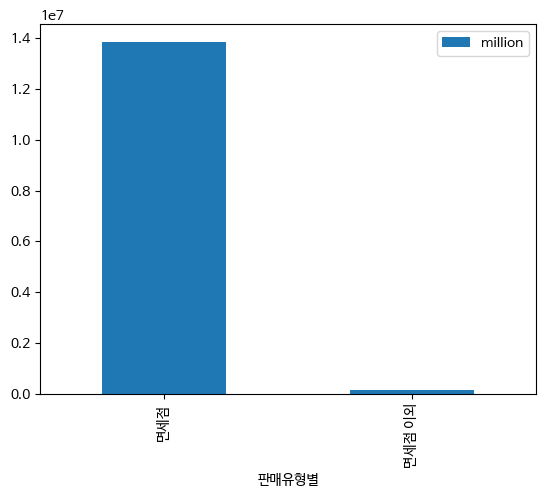

In [ ]:
# # 중국의 화장품의 판매유형별 판매액 총합을 막대그래프로 시각화하기

df_china_cosmetic_type.plot.bar()

### 4.6.5 화장품을 제외한 다른 상품들의 연도별, 국가(대륙)별  판매총액을 시각화해본다.

In [ ]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014 1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1


In [ ]:
# 화장품을 제외한 다른 모든 상품들만 추출하여 df_not_cosmetic으로 만들기

df_not_cosmetic = df.loc[df['상품군별'] != '화장품']
df_not_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014 1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
12593,기타,농축수산물,면세점 이외,2020 4/4 p),3.0,2020,4
12595,기타,생활용품 및 자동차용품,면세점,2020 4/4 p),0.0,2020,4
12596,기타,생활용품 및 자동차용품,면세점 이외,2020 4/4 p),391.0,2020,4
12598,기타,기 타,면세점,2020 4/4 p),0.0,2020,4


In [ ]:
# 화장품을 제외한 상품들의
# 연도별 상품군별 판매액 총액구하는 피벗테이블 만들기
# df_not_cosmetic_year_product

df_not_cosmetic_year_product = df_not_cosmetic.pivot_table(index='연도', columns= '상품군별', values='million', aggfunc='sum')
df_not_cosmetic_year_product

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기
연도,,,,,,,,,,,,,
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,75141.0,44235.0,118.0,6115.0,47041.0,21524.0,614.0,16640.0,17819.0,31052.0,34859.0,410938.0,8829.0
2018,99226.0,54329.0,214.0,4341.0,41103.0,28351.0,1344.0,15265.0,19665.0,46052.0,59642.0,528786.0,17921.0
2019,93777.0,61683.0,126.0,5898.0,48706.0,24272.0,909.0,18490.0,19109.0,39711.0,89433.0,564606.0,15236.0
2020,54979.0,93794.0,150.0,5796.0,35532.0,27108.0,964.0,19951.0,17496.0,23568.0,207677.0,381734.0,19322.0


<Axes: xlabel='연도'>

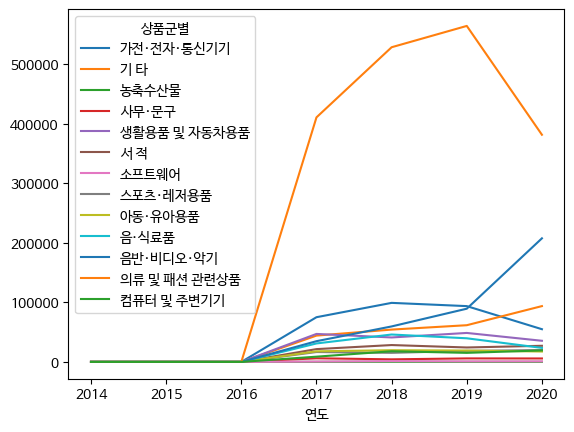

In [ ]:
# 화장품을 제외한 상품들의
# 연도별 상품군별 판매액 총액을 선그래프로 시각화하기

df_not_cosmetic_year_product.plot()

<Axes: xlabel='연도'>

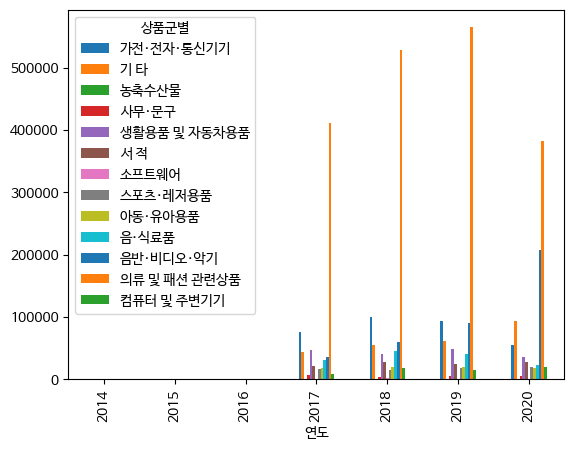

In [ ]:
# 화장품을 제외한 상품들의
# 연도별 상품군별 판매액 총액을 막대그래프로 시각화하기

df_not_cosmetic_year_product.plot.bar()

In [ ]:
# 화장품을 제외한 상품들의
# 연도별 국가(대륙)별 판매액 총합을 구하는 피벗테이블 만들기

b = df_not_cosmetic.pivot_table(index='연도', columns= '국가(대륙)별', values='million', aggfunc='sum')
b

국가(대륙)별,기타,대양주,미국,아세안(ASEAN),유럽연합(EU),일본,중국,중남미,중동
연도,,,,,,,,,
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,35943.0,14386.0,111953.0,68767.0,22077.0,121178.0,326529.0,8395.0,5697.0
2018,53533.0,13637.0,118912.0,75338.0,25761.0,175596.0,438720.0,9585.0,5157.0
2019,28131.0,9784.0,145393.0,84933.0,27303.0,182119.0,487840.0,10557.0,5896.0
2020,32007.0,13443.0,189255.0,104135.0,32160.0,159952.0,336326.0,11599.0,9194.0


<Axes: xlabel='연도'>

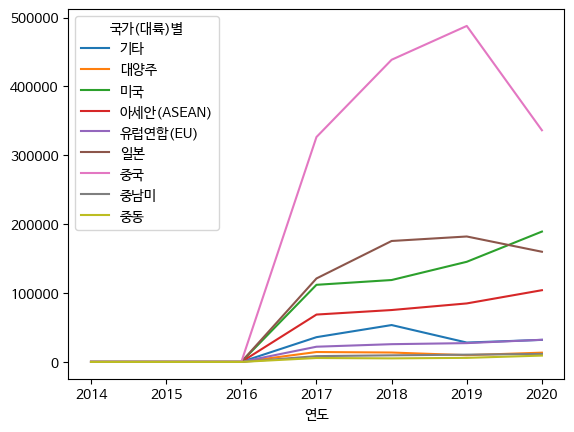

In [ ]:
# 화장품을 제외한 상품들의
# 연도별 국가(대륙)별 판매액 총합 선그래프로 시각화하기

b.plot()